In [100]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
Train= pd.read_csv('../data/Training Data.csv', index_col= 0)
X_train= Train.drop('Risk_Flag', axis= 1)
y_train= Train['Risk_Flag']

X_test= pd.read_csv('../data/Test Data.csv', index_col= 0)

y_test= pd.read_csv('../data/Prediction Data.csv', index_col= 0)
y_test= y_test.rename(columns= {'risk_flag':'Risk_Flag'})
y_test= y_test['Risk_Flag']

## 전처리

In [3]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252000 entries, 1 to 252000
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 23.1+ MB


In [4]:
X_train.head()
X_test.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
Id,,,,,,,,,,,
1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13
2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13
3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10
4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12
5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14


,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
ID,,,,,,,,,,,
1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


In [5]:
X_train= X_train.drop(['CITY','STATE'], axis= 1)
X_test= X_test.drop(['CITY','STATE'], axis= 1)

In [6]:
def get_category(profession):
    cat = ''
    if profession in ['Scientist', 'Statistician', 'Microbiologist', 'Physician', 'Geologist']: 
        cat = '과학 전문가 및 관련직'
    elif profession in ['Technician', 'Software_Developer', 'Computer_operator', 'Web_designer', 'Computer_hardware_engineer']: 
        cat = '정보 통신 전문가 및 기술직'
    elif profession in ['Dentist', 'Surgeon', 'Psychologist', 'Biomedical_Engineer']: 
        cat = '보건ㆍ사회복지 및 종교 관련직'
    elif profession in ['Civil_servant', 'Police_officer', 'Firefighter', 'Chef',  'Politician', 'Consultant', 'Secretary', 'Flight_attendant']: 
        cat = '서비스 종사자'
    elif profession in ['Lawyer', 'Magistrate', 'Drafter']: 
        cat = '법률 및 행정 전문직'
    elif profession in ['Financial_Analyst', 'Chartered_Accountant', 'Economist', 'Analyst']: 
        cat = '경영ㆍ금융전문가 및 관련직'
    elif profession in ['Librarian', 'Comedian', 'Hotel_Manager', 'Designer', 'Graphic_Designer', 'Fashion_Designer', 'Artist', 'Design_Engineer']: 
        cat = '문화ㆍ예술ㆍ스포츠 전문가 및 관련직'
    elif profession in ['Army_officer', 'Official']: 
        cat = '사무종사자'
    else : 
        cat = '공학 전문가 및 기술직'
    
    return cat

X_train['Profession'] = X_train['Profession'].apply(lambda x : get_category(x))
X_test['Profession'] = X_test['Profession'].apply(lambda x : get_category(x))

In [7]:
X_train= pd.get_dummies(X_train)
X_test= pd.get_dummies(X_test)

In [8]:
X_train.head()
X_test.head()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Married/Single_married,Married/Single_single,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented,...,Car_Ownership_yes,Profession_경영ㆍ금융전문가 및 관련직,Profession_공학 전문가 및 기술직,Profession_과학 전문가 및 관련직,Profession_문화ㆍ예술ㆍ스포츠 전문가 및 관련직,Profession_법률 및 행정 전문직,Profession_보건ㆍ사회복지 및 종교 관련직,Profession_사무종사자,Profession_서비스 종사자,Profession_정보 통신 전문가 및 기술직
Id,,,,,,,,,,,,,,,,,,,,,
1,1303834,23,3,3,13,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,7574516,40,10,9,13,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,3991815,66,4,4,10,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,6256451,41,2,2,12,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
5,5768871,47,11,3,14,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Married/Single_married,Married/Single_single,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented,...,Car_Ownership_yes,Profession_경영ㆍ금융전문가 및 관련직,Profession_공학 전문가 및 기술직,Profession_과학 전문가 및 관련직,Profession_문화ㆍ예술ㆍ스포츠 전문가 및 관련직,Profession_법률 및 행정 전문직,Profession_보건ㆍ사회복지 및 종교 관련직,Profession_사무종사자,Profession_서비스 종사자,Profession_정보 통신 전문가 및 기술직
ID,,,,,,,,,,,,,,,,,,,,,
1,7393090,59,19,4,13,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,1215004,25,5,5,10,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,8901342,50,12,9,14,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,1944421,49,9,3,12,1,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
5,13429,25,18,13,11,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,0


In [9]:
X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252000 entries, 1 to 252000
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype
---  ------                          --------------   -----
 0   Income                          252000 non-null  int64
 1   Age                             252000 non-null  int64
 2   Experience                      252000 non-null  int64
 3   CURRENT_JOB_YRS                 252000 non-null  int64
 4   CURRENT_HOUSE_YRS               252000 non-null  int64
 5   Married/Single_married          252000 non-null  uint8
 6   Married/Single_single           252000 non-null  uint8
 7   House_Ownership_norent_noown    252000 non-null  uint8
 8   House_Ownership_owned           252000 non-null  uint8
 9   House_Ownership_rented          252000 non-null  uint8
 10  Car_Ownership_no                252000 non-null  uint8
 11  Car_Ownership_yes               252000 non-null  uint8
 12  Profession_경영ㆍ금융전문가 및 관련직       252000 non-n

## 군집화

In [10]:
from sklearn.preprocessing import StandardScaler

### KMeans 군집화

In [15]:
loan= pd.DataFrame(data= X_test, columns= ['Income', 'Age', 'CURRENT_JOB_YRS'])
# KMeans 군집화를 수행 전 데이터 변환
loan.head()

,Income,Age,CURRENT_JOB_YRS
ID,,,
1,7393090,59,4
2,1215004,25,5
3,8901342,50,9
4,1944421,49,3
5,13429,25,13


In [50]:
kmeans= KMeans(n_clusters= 3, init= 'k-means++', max_iter= 300, random_state=0)
kmeans.fit(loan)

KMeans(n_clusters=3, random_state=0)

In [51]:
print(kmeans.labels_) # labels_ 값 확인

[1 2 1 ... 1 1 1]


In [52]:
loan['cluster']= kmeans.labels_

### 차원 축소 후 시각화

In [53]:
from sklearn.decomposition import PCA

# DF 의 속성이 3개이므로 2개로 차원 축소 후 개별 데이터 표현

pca= PCA(n_components= 2)
pca_transformed= pca.fit_transform(X_test)

loan['pca_x']= pca_transformed[:, 0]
loan['pca_y']= pca_transformed[:, 1]
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28000 entries, 1 to 28000
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Income           28000 non-null  int64  
 1   Age              28000 non-null  int64  
 2   CURRENT_JOB_YRS  28000 non-null  int64  
 3   pca_x            28000 non-null  float64
 4   pca_y            28000 non-null  float64
 5   cluster          28000 non-null  int32  
dtypes: float64(2), int32(1), int64(3)
memory usage: 2.4 MB


In [54]:
loan.groupby('Income').mean()
loan.groupby('Age').mean()
loan.groupby('CURRENT_JOB_YRS').mean()

,Age,CURRENT_JOB_YRS,pca_x,pca_y,cluster
Income,,,,,
10310,70.0,7.0,5.019253e+06,-19.917618,2
10318,32.0,8.0,5.019245e+06,18.116772,2
10675,23.0,1.0,5.018888e+06,27.148145,2
11114,73.0,4.0,5.018449e+06,-22.909250,2
11430,70.0,3.0,5.018133e+06,-19.913525,2
...,...,...,...,...,...
9992133,40.0,3.0,-4.962570e+06,9.997061,1
9993908,50.0,9.0,-4.964345e+06,-0.001632,1
9998070,58.0,13.0,-4.968507e+06,-8.015375,1


,Income,CURRENT_JOB_YRS,pca_x,pca_y,cluster
Age,,,,,
21,4.861051e+06,6.114719,168511.591408,29.059859,0.967532
22,5.308442e+06,5.908918,-278878.865746,28.054111,0.895636
23,5.178128e+06,6.198819,-148565.397003,27.053312,1.082677
24,5.435703e+06,6.439024,-406140.818106,26.050987,0.949002
25,5.259093e+06,6.274949,-229530.044396,25.052992,1.059063
26,5.283311e+06,5.770419,-253748.612930,24.054641,1.008830
27,4.760394e+06,6.841322,269168.158311,23.054901,1.107438
28,5.009896e+06,6.482379,19666.781932,22.055621,0.900881
29,4.916879e+06,6.262530,112683.174465,21.056822,0.937947


,Income,Age,pca_x,pca_y,cluster
CURRENT_JOB_YRS,,,,,
0,5.040810e+06,49.287430,-11247.734132,0.807250,1.054444
1,4.857352e+06,49.827804,172210.384037,0.264080,0.968404
2,5.134124e+06,49.424900,-104561.467106,0.659512,0.912450
3,5.103487e+06,50.973514,-73924.746499,-0.909777,1.008007
4,5.030808e+06,50.571060,-1245.552073,-0.509516,0.985176
5,5.018283e+06,49.585898,11280.053964,0.472592,1.034359
6,4.979546e+06,49.501358,50016.679402,0.553736,0.977493
7,4.911864e+06,49.348888,117698.278252,0.701760,1.000436
8,4.952843e+06,50.343385,76719.475190,-0.297072,0.981031


Text(0.5, 0, 'PCA 1')

Text(0, 0.5, 'PCA 2')

Text(0.5, 1.0, '3 Clusters Visualization by 2 PCA Components')

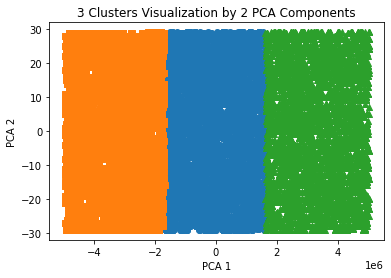

In [55]:
# 군집 값의 따라 별도 인덱스 추출

marker0_ind= loan[loan['cluster']== 0].index
marker1_ind= loan[loan['cluster']== 1].index
marker2_ind= loan[loan['cluster']== 2].index

# 각 군집 레벨의 pca_x / pca_y 값 추출 & o, s, ^ 마커 표시

plt.scatter(x= loan.loc[marker0_ind, 'pca_x'], y= loan.loc[marker0_ind, 'pca_y'], marker= 'o')
plt.scatter(x= loan.loc[marker1_ind, 'pca_x'], y= loan.loc[marker1_ind, 'pca_y'], marker= 's')
plt.scatter(x= loan.loc[marker2_ind, 'pca_x'], y= loan.loc[marker2_ind, 'pca_y'], marker= '^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

### 군집화 알고리즘 테스트

In [70]:
X, y= make_blobs(n_samples= 5000, n_features= 2, centers= 3, cluster_std= 0.8, random_state= 0)

print(X.shape, y.shape)

unique, counts= np.unique(y, return_counts= True)
print(unique, counts)

(5000, 2) (5000,)
[0 1 2] [1667 1667 1666]


In [71]:
cluster_df= pd.DataFrame(data= X, columns= ['ftr1', 'ftr2'])
cluster_df['target']= y
cluster_df.head()

,ftr1,ftr2,target
0,1.973318,0.401820,1
1,-2.019795,2.217498,2
2,-1.821934,3.515134,2
3,2.615553,0.725445,1
4,0.829946,5.020786,0


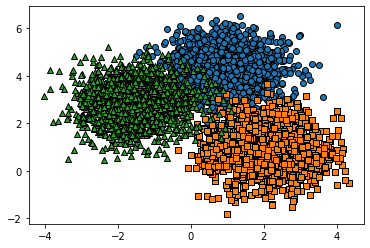

In [72]:
target_list= np.unique(y)

markers= ['o', 's', '^', 'P', 'D', 'H', 'x']

for target in target_list:
    target_cluster= cluster_df[cluster_df['target']== target]
    plt.scatter(x= target_cluster['ftr1'], y= target_cluster['ftr2'], edgecolor= 'k',
               marker= markers[target])
    
plt.show()

### KMeans 군집 수행 후 군집별 시각화

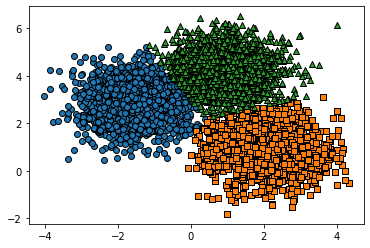

In [75]:
kmeans= KMeans(n_clusters= 3, init= 'k-means++', max_iter= 300, random_state= 0)
cluster_labels= kmeans.fit_predict(X)
cluster_df['kmeans_label']= cluster_labels

centers= kmeans.cluster_centers_
unique_labels= np.unique(cluster_labels)
markers= ['o', 's', '^', 'P', 'D', 'H', 'x']

for label in unique_labels:
    label_cluster= cluster_df[cluster_df['kmeans_label']== label]
    center_x_y= centers[label]
    plt.scatter(x= label_cluster['ftr1'], y= label_cluster['ftr2'], edgecolor= 'k',
               marker= markers[label])
    
plt.show()

### 실루엣 계수 측정

In [78]:
loan= X_test
feature_names= ['Income', 'Age', 'CURRENT_JOB_YRS']
loan_df= pd.DataFrame(data= X_test, columns= feature_names)
kmeans= KMeans(n_clusters= 3, init= 'k-means++', max_iter= 300, random_state= 0).fit(loan_df)
loan_df['cluster']= kmeans.labels_

# loan의 모든 개별 데이터에 실루엣 계수 값 계산

score_samples= silhouette_samples(X_test, loan_df['cluster'])
print('silhouette_samples' , score_samples.shape)

silhouette_samples (28000,)


In [79]:
loan_df['silhouette_coeff']= score_samples

In [80]:
# 실루엣 계수 값 계산

average_score= silhouette_score(X_test, loan_df['cluster'])
print('Silhouette Analysis Score :{0:.3f}'.format(average_score))

loan_df.head()

Silhouette Analysis Score :0.584


,Income,Age,CURRENT_JOB_YRS,cluster,silhouette_coeff
ID,,,,,
1,7393090,59,4,1,0.522546
2,1215004,25,5,2,0.761389
3,8901342,50,9,1,0.757675
4,1944421,49,3,2,0.730549
5,13429,25,13,2,0.661894


### 군집 칼럼별 평균 실루엣 계수

In [81]:
loan_df.groupby('cluster')['silhouette_coeff'].mean()

# 1,2 군집에 비해 0 군집의 평균 실루엣 계수가 낮은 것을 볼 수 있다

cluster
0    0.503461
1    0.620057
2    0.629299
Name: silhouette_coeff, dtype: float64

### 평균 실루엣 계수 시각화를 통해 군집 개수 최적화

In [92]:
def visualize_silhouette(cluster_lists, X_features):
    
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=300, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

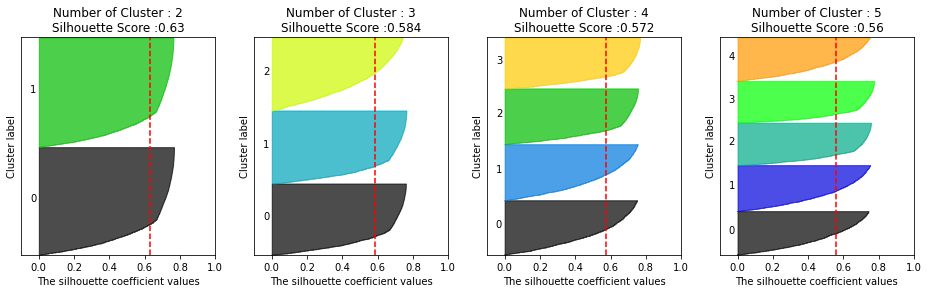

In [95]:
visualize_silhouette([2, 3, 4, 5], loan_df)

# K- 평균 수행 시 2개의 군집이 최적 ㅡ> 0.63

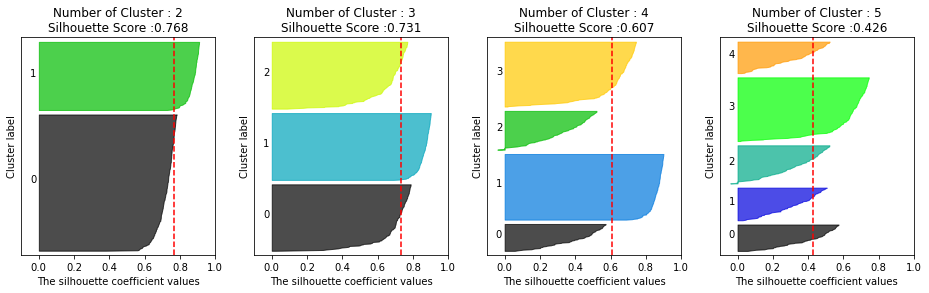

In [96]:
X, y= make_blobs(n_samples= 500, n_features= 2, centers= 3, cluster_std= 1,
                center_box= (-10.0, 10.0), shuffle= True, random_state= 1)

visualize_silhouette([2, 3, 4, 5], X)

# 2차원 데이터 세트 생성 후 K-평균 수행 시 2개의 군집이 최적 ㅡ> 0.768

## 결과

- 군집 개수는 2개로 하는 것이 가장 좋다고 볼 수 있다